<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

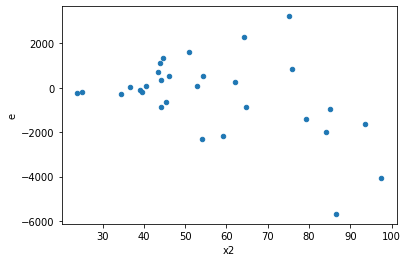

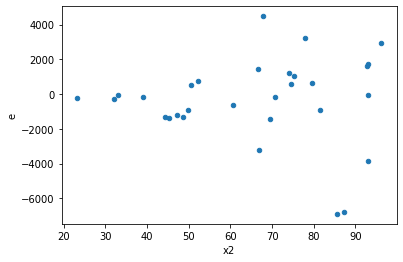

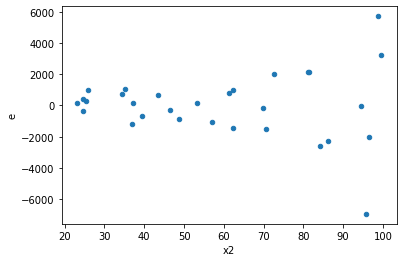

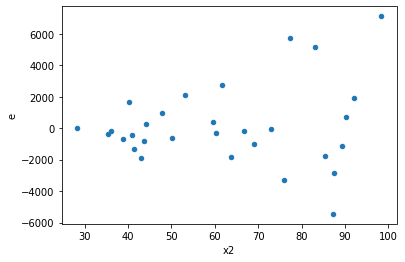

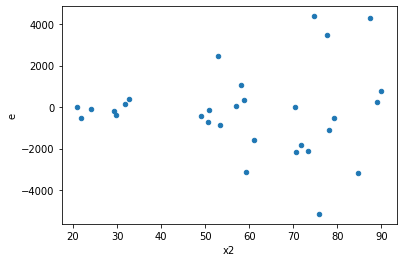

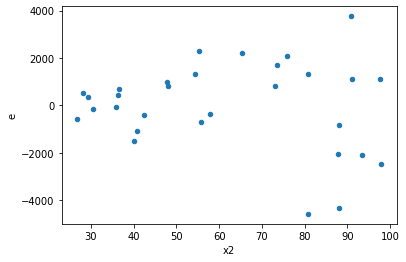

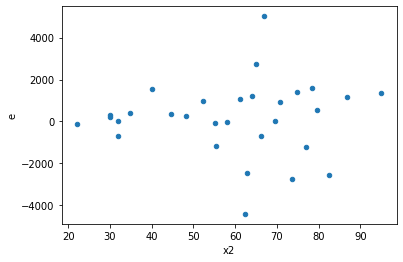

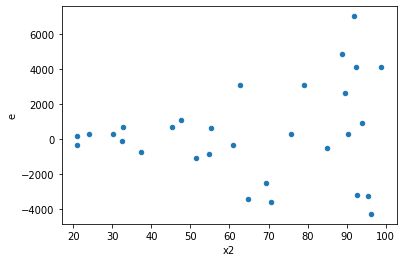

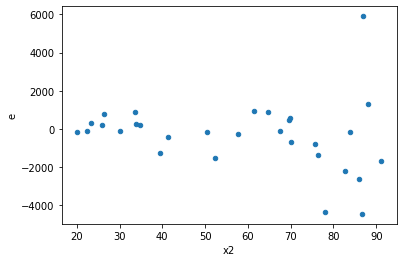

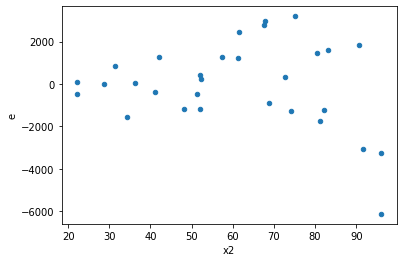

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,13.0,16364289.275646413,50716667.33972851,1487662.6614224012,3901282.103056039,2.622423889651099,0.10158535804028235,0.9492073209798588,0.050792679020141174,Reject001=1 : Homoscedasticity
2.0,12.0,12.0,12353581.823642015,107806413.6910415,1029465.151970168,8983867.807586791,8.726733285137103,0.0006893064544724048,0.9996553467727638,0.0003446532272362024,Reject001=0 : Heteroscedasticity
6.0,9.0,15.0,12869817.089332808,65491158.2577783,1429979.6765925342,4366077.21718522,3.05324424441405,0.05455702960025821,0.9727214851998709,0.027278514800129106,Reject001=1 : Homoscedasticity
8.0,14.0,10.0,32016320.37906773,26248933.420301914,2286880.0270762662,2624893.3420301913,1.147805442765648,0.844088060974596,0.577955969512702,0.422044030487298,Reject001=1 : Homoscedasticity
9.0,5.0,19.0,1403168.2959445973,94212155.59206422,280633.65918891947,4958534.504845485,17.669065496906253,2.9261401650604313e-06,0.9999985369299175,1.4630700825302156e-06,Reject001=0 : Heteroscedasticity
10.0,11.0,13.0,35484058.344847955,109740382.25538501,3225823.4858952686,8441567.865798848,2.6168722196701486,0.10231446851711556,0.9488427657414422,0.05115723425855778,Reject001=1 : Homoscedasticity
11.0,14.0,10.0,3989593.457618534,44756580.183262445,284970.9612584667,4475658.018326244,15.705663477293228,0.00011540445655300324,0.9999422977717235,5.770222827650162e-05,Reject001=0 : Heteroscedasticity
15.0,18.0,6.0,34538668.484634854,22023425.699308883,1918814.9158130474,3670570.9498848137,1.9129364273935225,0.4326601227551157,0.7836699386224422,0.21633006137755784,Reject001=1 : Homoscedasticity
16.0,13.0,11.0,24395409.560593866,126309971.21428755,1876569.9661995282,11482724.655844323,6.1189962871991375,0.004912014498486661,0.9975439927507567,0.0024560072492433305,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,13.0,16364289.275646413,50716667.33972851,1487662.6614224012,3901282.103056039,2.622423889651099,0.10158535804028235,Reject001=1 : Homoscedasticity
1.0,13.0,11.0,140020437.03608847,8678257.39199781,10770802.848929882,788932.4901816192,0.0732473243867798,4.26658933148646e-05,Reject001=0 : Heteroscedasticity
2.0,12.0,12.0,12353581.823642015,107806413.6910415,1029465.151970168,8983867.807586791,8.726733285137103,0.0006893064544724048,Reject001=0 : Heteroscedasticity
3.0,12.0,12.0,114282178.73924616,33112246.12602525,9523514.89493718,2759353.843835437,0.2897411170430724,0.04126950163172656,Reject001=1 : Homoscedasticity
4.0,7.0,17.0,36307167.88995288,80374617.63639171,5186738.269993269,4727918.68449363,0.9115398615438072,0.9582390788603518,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,74544599.85591193,6125959.990010515,5734199.988916302,556905.4536373195,0.09711999140486348,0.000204876964228507,Reject001=0 : Heteroscedasticity
6.0,9.0,15.0,12869817.089332808,65491158.2577783,1429979.6765925342,4366077.21718522,3.05324424441405,0.05455702960025821,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,148205967.7366788,38654884.85414724,14820596.773667881,2761063.20386766,0.18629905705101624,0.011185859009357358,Reject001=1 : Homoscedasticity
8.0,14.0,10.0,32016320.37906773,26248933.420301914,2286880.0270762662,2624893.3420301913,1.147805442765648,0.844088060974596,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      611
Reject001=0 : Heteroscedasticity    389
Name: Result_test, dtype: int64